(1300, 1392, 31)


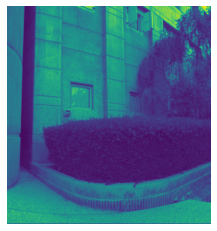

In [24]:
import numpy as np
import mat73
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


data = mat73.loadmat("1.mat","r")
bands = np.array(data["bands"])
slices = np.array(data["rad"])
preview = np.array(data["rgb"])
dimensions = preview.shape

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

X = data["rad"]
Y = data["rgb"]
print(X.shape)

#convert to dataFrame
def convertdf(x,y):
    X = x.reshape(-1, x.shape[2])
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    df = pd.DataFrame(data = X)
    df.columns= [i for i in range(0, X.shape[1])]
    df.head()
    return df

df = convertdf(X,Y)

#PCA
from sklearn.decomposition import PCA
n = 3
pca = PCA(n_components = n)

dt = pd.DataFrame(pca.fit_transform(df.iloc[:, :-1].values))

'''
for i in range(n):
    pc = np.array(dt[i]).reshape(X.shape[0],X.shape[1])
    pc = np.rot90(pc,1)
    plt.imshow(pc)
    plt.show()
'''
plt.imshow(preview)
plt.axis('off')
plt.savefig("test1.png")
plt.show()

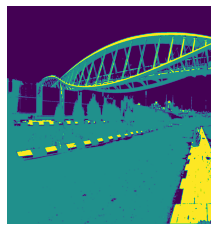

In [23]:
import cv2
from sklearn.cluster import KMeans
#no_pcs = list(range(int(input("Number of PCs to be used : "))))
#classes = int(input("Please select number of classes: "))
no_pcs = 3
classes = 3
km = KMeans(n_clusters = classes)
y_predicted = km.fit_predict(dt[[0,1,2]])

choices = ["red","green","blue","yellow","purple","pink","orange"]
print(f"Colours: {choices[:classes]}")
colours = np.array([[255,0,0],[0,128,0],[0,0,255],[255,255,0],[75,0,130],[238,130,238], [255,165,0]])

display = np.array(y_predicted).reshape(X.shape[0],X.shape[1])
display = np.rot90(display,1)
display = [[colours[j] for j in i ] for i in display]
plt.imshow(display)
plt.axis('off')
plt.savefig("test2.png")
plt.show()


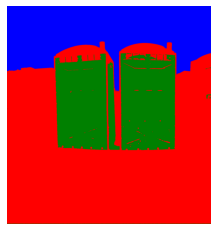

In [20]:
from sklearn.mixture import GaussianMixture
Y = dt[[0,1,2]]
model = GaussianMixture(n_components=3)
model.fit(Y)
yhat = model.fit_predict(Y)
display = np.array(yhat).reshape(X.shape[0],X.shape[1])
display = np.rot90(display,1)
colours = np.array([[255,0,0],[0,128,0],[0,0,255],[255,255,0],[75,0,130],[238,130,238], [255,165,0]])
display = [[colours[j] for j in i ] for i in display]
plt.imshow(display)
plt.axis('off')
plt.savefig("test3.png")
plt.show()


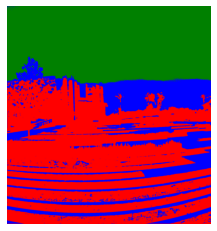

red region represents : ground
green region represents : sky
blue region represents : blue sky


In [17]:
plt.imshow(display)
plt.axis('off')
plt.show()
replacements = []
for i in choices[:classes]:
    replacements.append(input(f"{i} region represents : "))

output = np.array([replacements[i] for i in y_predicted])
output = np.rot90(output.reshape(X.shape[0],X.shape[1]),1)
np.savetxt("Annotation.csv",output,delimiter = ",", fmt='%s')

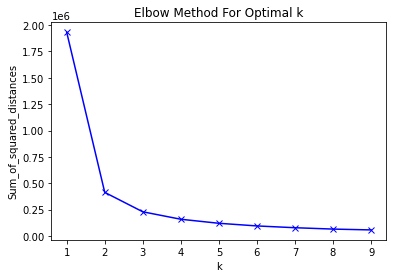

In [12]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dt[[0,1,2]])
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import MeanShift
Y = dt[[0,1,2]]
model = MeanShift()
model.fit(Y)
yhat = model.fit_predict(Y)
display = np.array(yhat).reshape(X.shape[0],X.shape[1])
display = np.rot90(display,1)
colours = np.array([[255,0,0],[0,128,0],[0,0,255],[255,255,0],[75,0,130],[238,130,238], [255,165,0]])
display = [[colours[j] for j in i ] for i in display]
plt.imshow(display)
plt.show()

In [ ]:
from sklearn.cluster import SpectralClustering
Y = dt[[0,1,2]]
model = SpectralClustering(n_clusters=3)
model.fit(Y)
yhat = model.fit_predict(Y)
display = np.array(yhat).reshape(X.shape[0],X.shape[1])
display = np.rot90(display,1)
colours = np.array([[255,0,0],[0,128,0],[0,0,255],[255,255,0],[75,0,130],[238,130,238], [255,165,0]])
display = [[colours[j] for j in i ] for i in display]
plt.imshow(display)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
Y = dt[[0,1,2]]
model = DBSCAN(eps=0.3, min_samples=10)
model.fit(Y)
yhat = model.fit_predict(Y)
display = np.array(yhat).reshape(X.shape[0],X.shape[1])
display = np.rot90(display,1)
colours = np.array([[255,0,0],[0,128,0],[0,0,255],[255,255,0],[75,0,130],[238,130,238], [255,165,0]])
display = [[colours[j] for j in i ] for i in display]
plt.imshow(display)
plt.show()